In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos =pd.read_csv(r"train.csv",encoding='latin-1')
#abro el data frame

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
#voy a analizar cuantos tweets contienen un @ en el texto, creo una serie booleana
#que por cada tweet con @ tiene true, y sino false
contieneArr = datos['text'].str.contains('@')
contieneArr.value_counts()

False    5574
True     2039
Name: text, dtype: int64

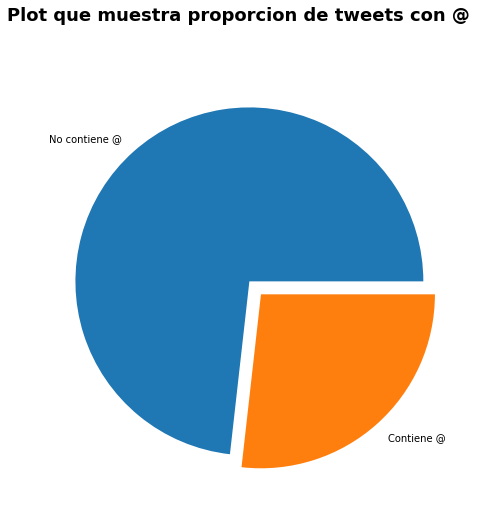

In [5]:
#grafico cantidad de tweets con @ y que no
names = ['No contiene @', 'Contiene @']
plt.figure(figsize=(12, 8))
plt.pie(contieneArr.value_counts(),labels=names,explode=(0,0.1))
plt.suptitle('Plot que muestra proporcion de tweets con @',fontsize=18,fontweight='bold')
plt.savefig("image1.png")

In [6]:
#analizo la relacion entre los tweets que contienen @ con la veracidad del tweet
noarrsiverd=((contieneArr==0) & (datos.target==1)).value_counts()
siarrsiverd=((contieneArr==1) & (datos.target==1)).value_counts()
siarrnoverd=((contieneArr==1) & (datos.target==0)).value_counts()
noarrnoverd=((contieneArr==0) & (datos.target==0)).value_counts()

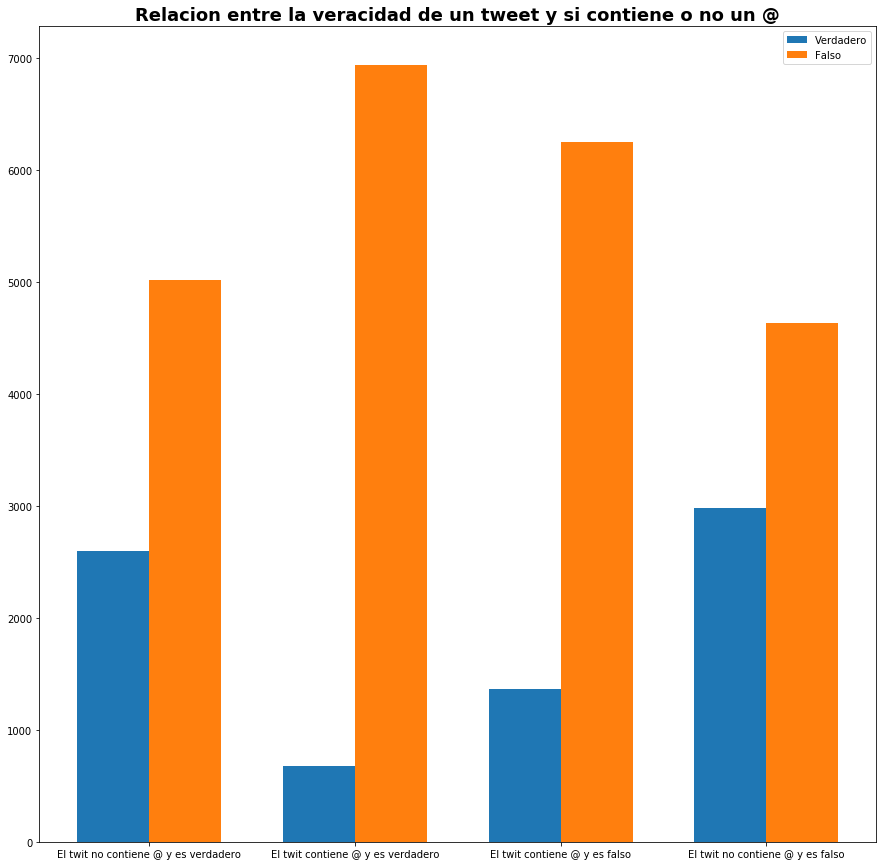

In [7]:
#hago un grafico de barras compuesto para cada relacion que determine recien
N = 4
fig, ax = plt.subplots(figsize=(15,15))
verdaderos = [noarrsiverd.loc[True],siarrsiverd.loc[True],siarrnoverd.loc[True],noarrnoverd.loc[True]]
falsos = [noarrsiverd.loc[False],siarrsiverd.loc[False],siarrnoverd.loc[False],noarrnoverd.loc[False]]

ind = np.arange(N) 
width = 0.35         
p1 = ax.bar(ind, verdaderos , width, bottom=0)
p2 = ax.bar(ind + width, falsos, width, bottom=0)

ax.set_title('Relacion entre la veracidad de un tweet y si contiene o no un @',fontsize=18,fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('El twit no contiene @ y es verdadero', 'El twit contiene @ y es verdadero', 
                    'El twit contiene @ y es falso', 
                    'El twit no contiene @ y es falso'))
ax.legend((p1[0], p2[0]), ('Verdadero', 'Falso'))
plt.savefig("image2.png")

Relacion entre longitud del tweet y cuantos otros usuarios @

In [8]:
datos['longitudTweet']=datos.text.str.len()

In [9]:
datos['cantidad@']=datos.text.str.count('@')

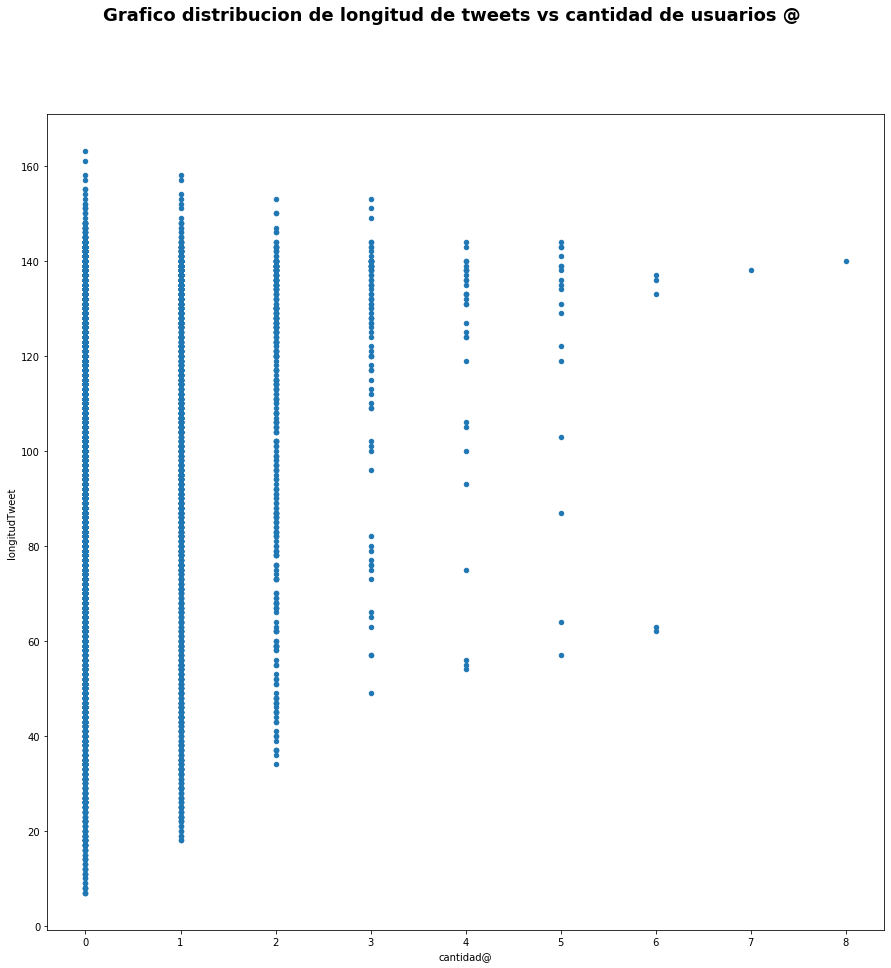

In [10]:
datos.plot.scatter(x='cantidad@',y='longitudTweet',figsize=(15,15))
plt.suptitle(('Grafico distribucion de longitud de tweets vs cantidad de usuarios @'),fontsize=18,fontweight='bold')
plt.savefig("image3.png")

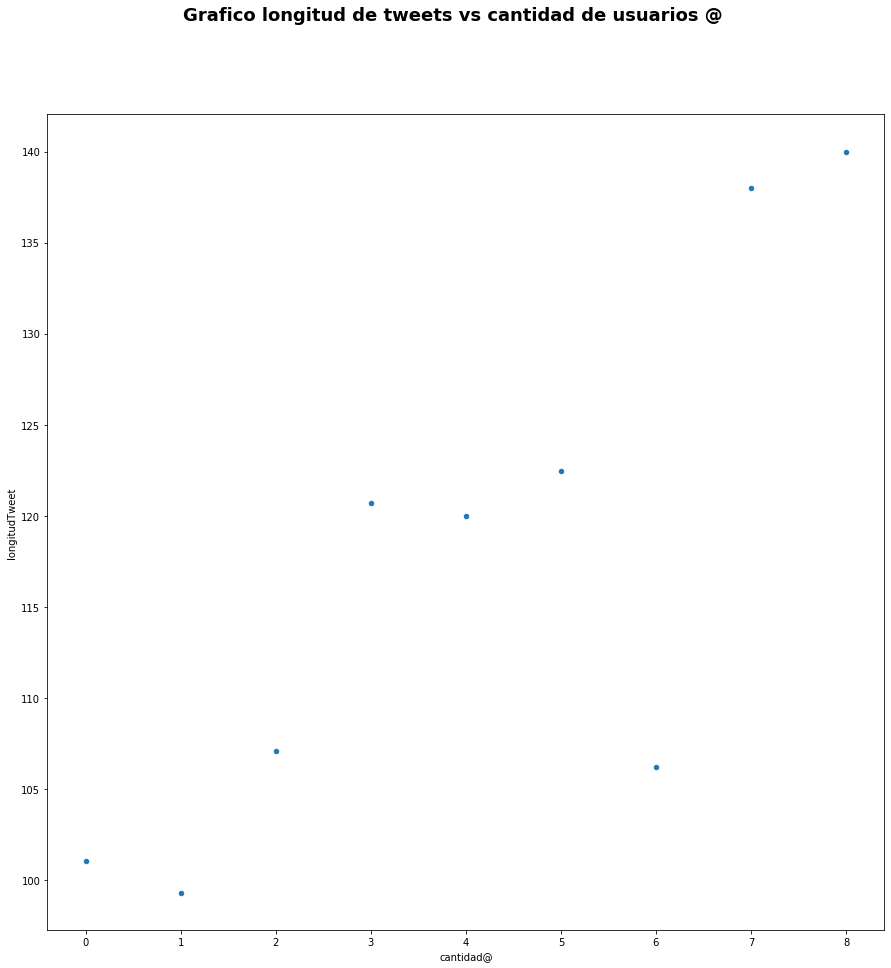

In [11]:
ejes = datos.groupby('cantidad@').agg({'longitudTweet':'mean'})
ejes.reset_index(level=0, inplace=True)
ejes.plot.scatter(x='cantidad@',y='longitudTweet',figsize=(15,15))
plt.suptitle('Grafico longitud de tweets vs cantidad de usuarios @',fontsize=18,fontweight='bold')
plt.savefig("image4.png")

Analizo cantidad promedio de usuarios @ por keyword

In [12]:
datos.dropna(axis=0,subset=['keyword'])

,id,keyword,location,text,target,longitudTweet,cantidad@
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,0
...,...,...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0,48,2
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,107,0
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93,0
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,1


In [13]:
ejes = datos.groupby('keyword').agg({'cantidad@':'mean'})
ejes.reset_index(level=0,inplace=True)

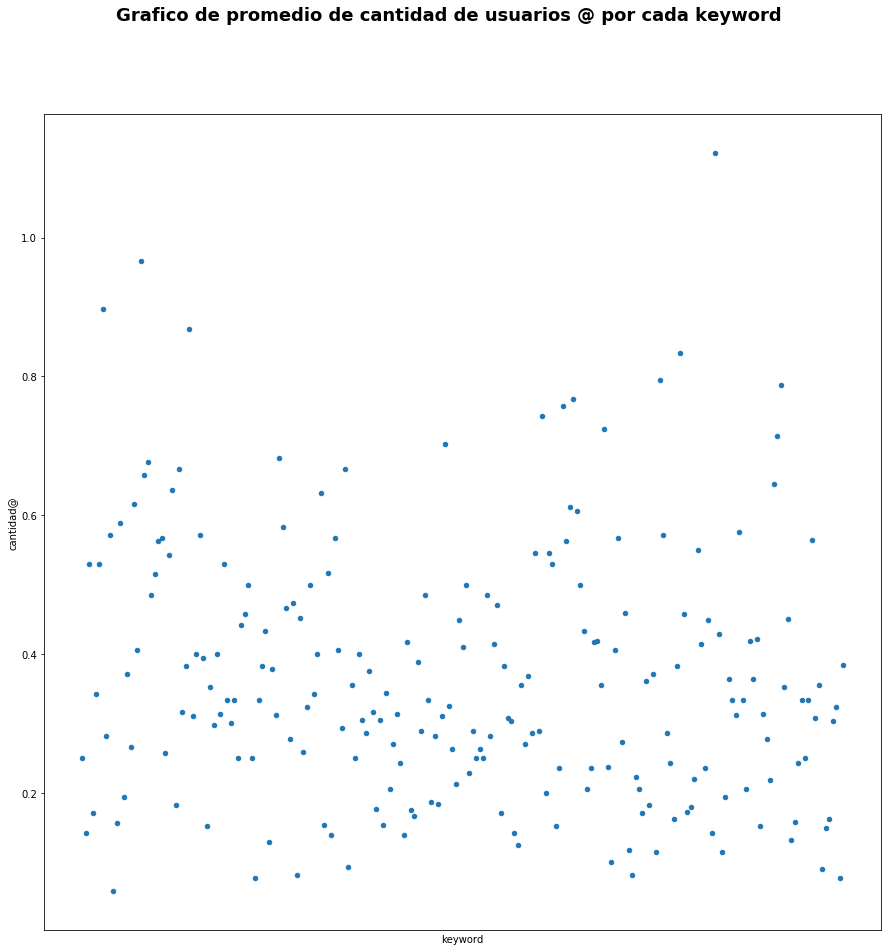

In [14]:
ejes.plot.scatter(x='keyword',y='cantidad@',figsize=(15,15),xticks=[])
plt.suptitle('Grafico de promedio de cantidad de usuarios @ por cada keyword',fontsize=18,fontweight='bold')
plt.savefig("image5.png")